### 유튜브 랭킹 크롤링

- https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1
- 1~10 페이지 크롤링
- 카테고리명, 채널명, 구독자수, view수, 동영상 개수 추출
- 추출된 정보는 엑셀 저장
- selenium + soup

In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt

import time

In [5]:
url = 'https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1'

In [10]:
prev_height = browser.execute_script("return document.documentElement.scrollHeight")
prev_height

11534

In [13]:
s = Service('../../chromedriver')
browser = webdriver.Chrome(service=s)
browser.get(url)

time.sleep(3)

# 현재 페이지, 크롤링할 페이지 개수
cur_page, target_crawl_num = 1,10

# 순위
idx = 1

# 리스트 생성
youtube_list = []

# while cur_page <= target_crawl_num:
    
#     # 2초에 한번씩 스크롤 이동
#     interval = 3

#     # 현재 문서 높이 가져와서 저장
#     prev_height = browser.execute_script("return document.documentElement.scrollHeight")


    
#     soup = BeautifulSoup(browser.page_source, 'lxml')
    
#     songs = soup.select('')

#     print('============ Current Page : {}'.format(cur_page))
    
#     for song in songs:
#         pass
    
#     cur_page += 1
    
#     # soup 제거
#     del soup
    
#     # 다음 페이지 클릭
#     browser.find_element(By.CSS_SELECTOR,'#list-skin > nav > span > a:nth-child("4")'.click()
    
    

In [11]:
browser.current_url

'https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1'

In [14]:
# 2초에 한번씩 스크롤 이동
interval = 3

# 현재 문서 높이 가져와서 저장
prev_height = browser.execute_script("return document.body.scrollHeight")

while True:

    # 페이지 로딩 대기
    time.sleep(interval)

    # 스크롤 이동
    browser.execute_script("window.scrollTo(0,document.body.scrollHeight)")

    time.sleep(3)

    # 스크롤이 진행된 후 현재 문서 높이
    curr_height = browser.execute_script("return document.body.scrollHeight")

    if curr_height == prev_height:
        break
    prev_height = curr_height

time.sleep(2)

soup = BeautifulSoup(browser.page_source, 'lxml')

In [18]:
total_info = soup.find_all('tr','aos-init')
print(total_info[0])

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203&amp;page=1"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AKedOLQ36QGusRG7UR-Cz9rBFNGtLf_uLqKP0aJ9EfTMww=s88-c-k-c0x00ffffff-no-rj-mo" height="88" src="https://yt3.ggpht.com/ytc/AKedOLQ36QGusRG7UR-Cz9rBFNGtLf_uLqKP0aJ9EfTMww=s88-c-k-c0x00ffffff-no-rj-mo" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
</h1><p class="category" href="https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203&amp;page=1">
								
								BLACK

### 카테고리명, 채널명, 구독자 수, view 수, 동영상 개수 추출

In [19]:
for info in total_info[:5]:
    
    category = info.select_one('p.category').text.strip()
    title = info.select_one('.subject a').text.strip()
    subscriber_cnt = info.select_one('.subscriber_cnt').text.strip()
    view_cnt = info.select_one('.view_cnt').text.strip()
    video_cnt = info.select_one('.video_cnt').text.strip()
    
    print(category,title,subscriber_cnt,view_cnt,video_cnt)

[음악/댄스/가수] BLACKPINK 7510만 242억2588만 395개
[음악/댄스/가수] BANGTANTV 6900만 170억5702만 1,741개
[음악/댄스/가수] HYBE LABELS 6730만 234억4092만 924개
[음악/댄스/가수] SMTOWN 3060만 248억6745만 3,930개
[키즈/어린이] Boram Tube Vlog [보람튜브 브이로그] 2650만 110억5288만 223개


In [20]:
for page in range(1,11):
    url = f'https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}'
    print(url)

https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1
https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=2
https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=3
https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=4
https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=5
https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=6
https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=7
https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=8
https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=9
https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=10


### 1~10 페이지 유튜브 랭킹 정보 수집 

In [23]:
s = Service('../../chromedriver')
browser = webdriver.Chrome(service=s)

# 리스트 생성
youtube_list = []

for page in range(1,11):
    
    url = f'https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}'
    print(url)
    
    browser.get(url)
    
    time.sleep(3)
    
    # 2초에 한번씩 스크롤 이동
    interval = 2

    # 현재 문서 높이 가져와서 저장
    prev_height = browser.execute_script("return document.body.scrollHeight")

    # 스크롤 내리기
    while True:

        # 페이지 로딩 대기
        time.sleep(interval)

        # 스크롤 이동
        browser.execute_script("window.scrollTo(0,document.body.scrollHeight)")

        time.sleep(3)

        # 스크롤이 진행된 후 현재 문서 높이
        curr_height = browser.execute_script("return document.body.scrollHeight")

        if curr_height == prev_height:
            break
        prev_height = curr_height

    time.sleep(2)

    soup = BeautifulSoup(browser.page_source, 'lxml')
    
    # 노래정보
    total_info = soup.find_all('tr','aos-init')
    
    # 파싱
    for info in total_info:
    
        category = info.select_one('p.category').text.strip()
        title = info.select_one('.subject a').text.strip()
        subscriber_cnt = info.select_one('.subscriber_cnt').text.strip()
        view_cnt = info.select_one('.view_cnt').text.strip()
        video_cnt = info.select_one('.video_cnt').text.strip()

        # print(category,title,subscriber_cnt,view_cnt,video_cnt)
        
        # 리스트 삽입
        youtube_list.append([category,title,subscriber_cnt,view_cnt,video_cnt])
        
    # 한번 끝나면 soup 제거
    del soup

https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1
https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=2
https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=3
https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=4
https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=5
https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=6
https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=7
https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=8
https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=9
https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=10


In [31]:
columns = ['category','title','subscriber_cnt','view_cnt','video_cnt']
df = pd.DataFrame(youtube_list, columns=columns)
df.to_excel('../../data/dataset/youtube.xlsx',index=False)

### 데이터 로드

In [33]:
# 엑셀 파일 로드
youtube_df = pd.read_excel('../../data/dataset/youtube.xlsx')
youtube_df

,category,title,subscriber_cnt,view_cnt,video_cnt
0,[음악/댄스/가수],BLACKPINK,7510만,242억2588만,395개
1,[음악/댄스/가수],BANGTANTV,6900만,170억5702만,"1,741개"
2,[음악/댄스/가수],HYBE LABELS,6730만,234억4092만,924개
3,[음악/댄스/가수],SMTOWN,3060만,248억6745만,"3,930개"
4,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223개
...,...,...,...,...,...
995,[TV/방송],KBS COMEDY: 크큭티비,61만,8억3971만,"6,702개"
996,[키즈/어린이],꾸삐KUPI,61만,3억6613만,725개
997,[게임],코아 TV,61만,5억1843만,"1,303개"
998,[미분류],강쉪,61만,1억4365만,754개


In [34]:
youtube_df.shape

(1000, 5)

In [35]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category        1000 non-null   object
 1   title           1000 non-null   object
 2   subscriber_cnt  1000 non-null   object
 3   view_cnt        1000 non-null   object
 4   video_cnt       1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


### 데이터 전처리

#### 1) 구독자 수 컬럼에서 '만 ==> 0000 으로 대체(새로운 컬럼(subscriber)으로 생성)
- 7510만 ==> 75100000

In [46]:
youtube_df['subscriber'] = youtube_df['subscriber_cnt'].str.replace('만','0000')

In [48]:
youtube_df.head()

,category,title,subscriber_cnt,view_cnt,video_cnt,subscriber
0,[음악/댄스/가수],BLACKPINK,7510만,242억2588만,395개,75100000
1,[음악/댄스/가수],BANGTANTV,6900만,170억5702만,"1,741개",69000000
2,[음악/댄스/가수],HYBE LABELS,6730만,234억4092만,924개,67300000
3,[음악/댄스/가수],SMTOWN,3060만,248억6745만,"3,930개",30600000
4,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223개,26500000


In [49]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category        1000 non-null   object
 1   title           1000 non-null   object
 2   subscriber_cnt  1000 non-null   object
 3   view_cnt        1000 non-null   object
 4   video_cnt       1000 non-null   object
 5   subscriber      1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


#### 2) subscriber 컬럼 데이터 타입 변경(object ==> int64)

In [52]:
youtube_df['subscriber'] = youtube_df['subscriber'].astype('int64')

In [54]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category        1000 non-null   object
 1   title           1000 non-null   object
 2   subscriber_cnt  1000 non-null   object
 3   view_cnt        1000 non-null   object
 4   video_cnt       1000 non-null   object
 5   subscriber      1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


## 데이터 분석

#### 1. 카테고리 별로 구독자 수와 채널 수 알아보기

In [70]:
youtube_pivot = youtube_df.pivot_table(index='category',values='subscriber',aggfunc=['sum','count'])

In [71]:
youtube_pivot

,sum,count
,subscriber,subscriber
category,,
[BJ/인물/연예인],94700000,62
[IT/기술/컴퓨터],8590000,7
[TV/방송],256860000,139
[게임],69340000,62
[교육/강의],26370000,21
[국내/해외/여행],5520000,6
[뉴스/정치/사회],89640000,58
[미분류],217940000,157


#### 컬럼명 변경: '전체구독자수', '카테고리수'

In [72]:
youtube_pivot.columns = ['전체 구독자수','카테고리 수']

In [73]:
youtube_pivot

,전체 구독자수,카테고리 수
category,,
[BJ/인물/연예인],94700000,62
[IT/기술/컴퓨터],8590000,7
[TV/방송],256860000,139
[게임],69340000,62
[교육/강의],26370000,21
[국내/해외/여행],5520000,6
[뉴스/정치/사회],89640000,58
[미분류],217940000,157
[스포츠/운동],15450000,10


In [76]:
youtube_pivot.reset_index(inplace=True)
youtube_pivot

,category,전체 구독자수,카테고리 수
0,[BJ/인물/연예인],94700000,62
1,[IT/기술/컴퓨터],8590000,7
2,[TV/방송],256860000,139
3,[게임],69340000,62
4,[교육/강의],26370000,21
5,[국내/해외/여행],5520000,6
6,[뉴스/정치/사회],89640000,58
7,[미분류],217940000,157
8,[스포츠/운동],15450000,10
9,[애완/반려동물],27150000,16


In [77]:
youtube_pivot

,category,전체 구독자수,카테고리 수
0,[BJ/인물/연예인],94700000,62
1,[IT/기술/컴퓨터],8590000,7
2,[TV/방송],256860000,139
3,[게임],69340000,62
4,[교육/강의],26370000,21
5,[국내/해외/여행],5520000,6
6,[뉴스/정치/사회],89640000,58
7,[미분류],217940000,157
8,[스포츠/운동],15450000,10
9,[애완/반려동물],27150000,16


#### 전체 구독자 수를 기준으로 내림차순 정렬

In [87]:
youtube_pivot.sort_values('전체 구독자수', ascending=False, inplace=True)
youtube_pivot.head(5)

,category,전체 구독자수,카테고리 수
12,[음악/댄스/가수],764510000,166
17,[키즈/어린이],274500000,87
2,[TV/방송],256860000,139
7,[미분류],217940000,157
11,[음식/요리/레시피],201340000,80


In [90]:
youtube_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 12 to 16
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  21 non-null     object
 1   전체 구독자수   21 non-null     int64 
 2   카테고리 수    21 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 672.0+ bytes


## 시각화

#### pie 차트 작성 - 전체 구독자 수 

In [98]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

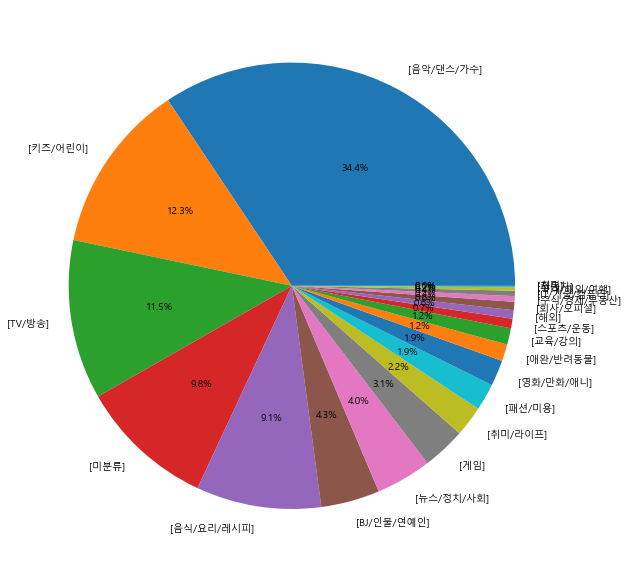

In [102]:
plt.figure(figsize=(10,30))
labels = youtube_pivot['category'] # 이름
values = youtube_pivot['전체 구독자수'] # 숫자

plt.pie(values,labels=labels,autopct='%.1f%%')
plt.show()

#### 카테고리 별 채널 수

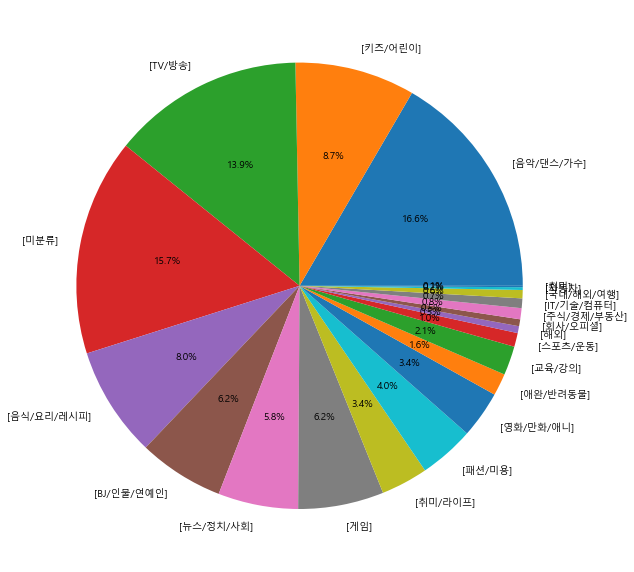

In [104]:
plt.figure(figsize=(10,30))
labels = youtube_pivot['category'] # 이름
values = youtube_pivot['카테고리 수'] # 숫자

plt.pie(values,labels=labels,autopct='%.1f%%')
plt.show()